In [23]:
import uproot as ur
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")
hep.style.use(hep.style.CMS)

matplotlib.rcParams['figure.figsize'] = [32, 24]

In [24]:
data_directory = "/home/matias/proyecto/RGE-Preliminary-Plots/data/"
file_name = "ntuples_dc_All.root"
with ur.open("%s:data"%(data_directory+file_name)) as events:
    branches = events.arrays()

In [25]:
electron_cut = (branches["pid"]==11) & (branches["trigger_status"]==1)
targets_A = {"Pb":12}
solid_target = "Pb"

Text(0.5, 1.0, 'Run 20046, LD2 + C, 85 nA')

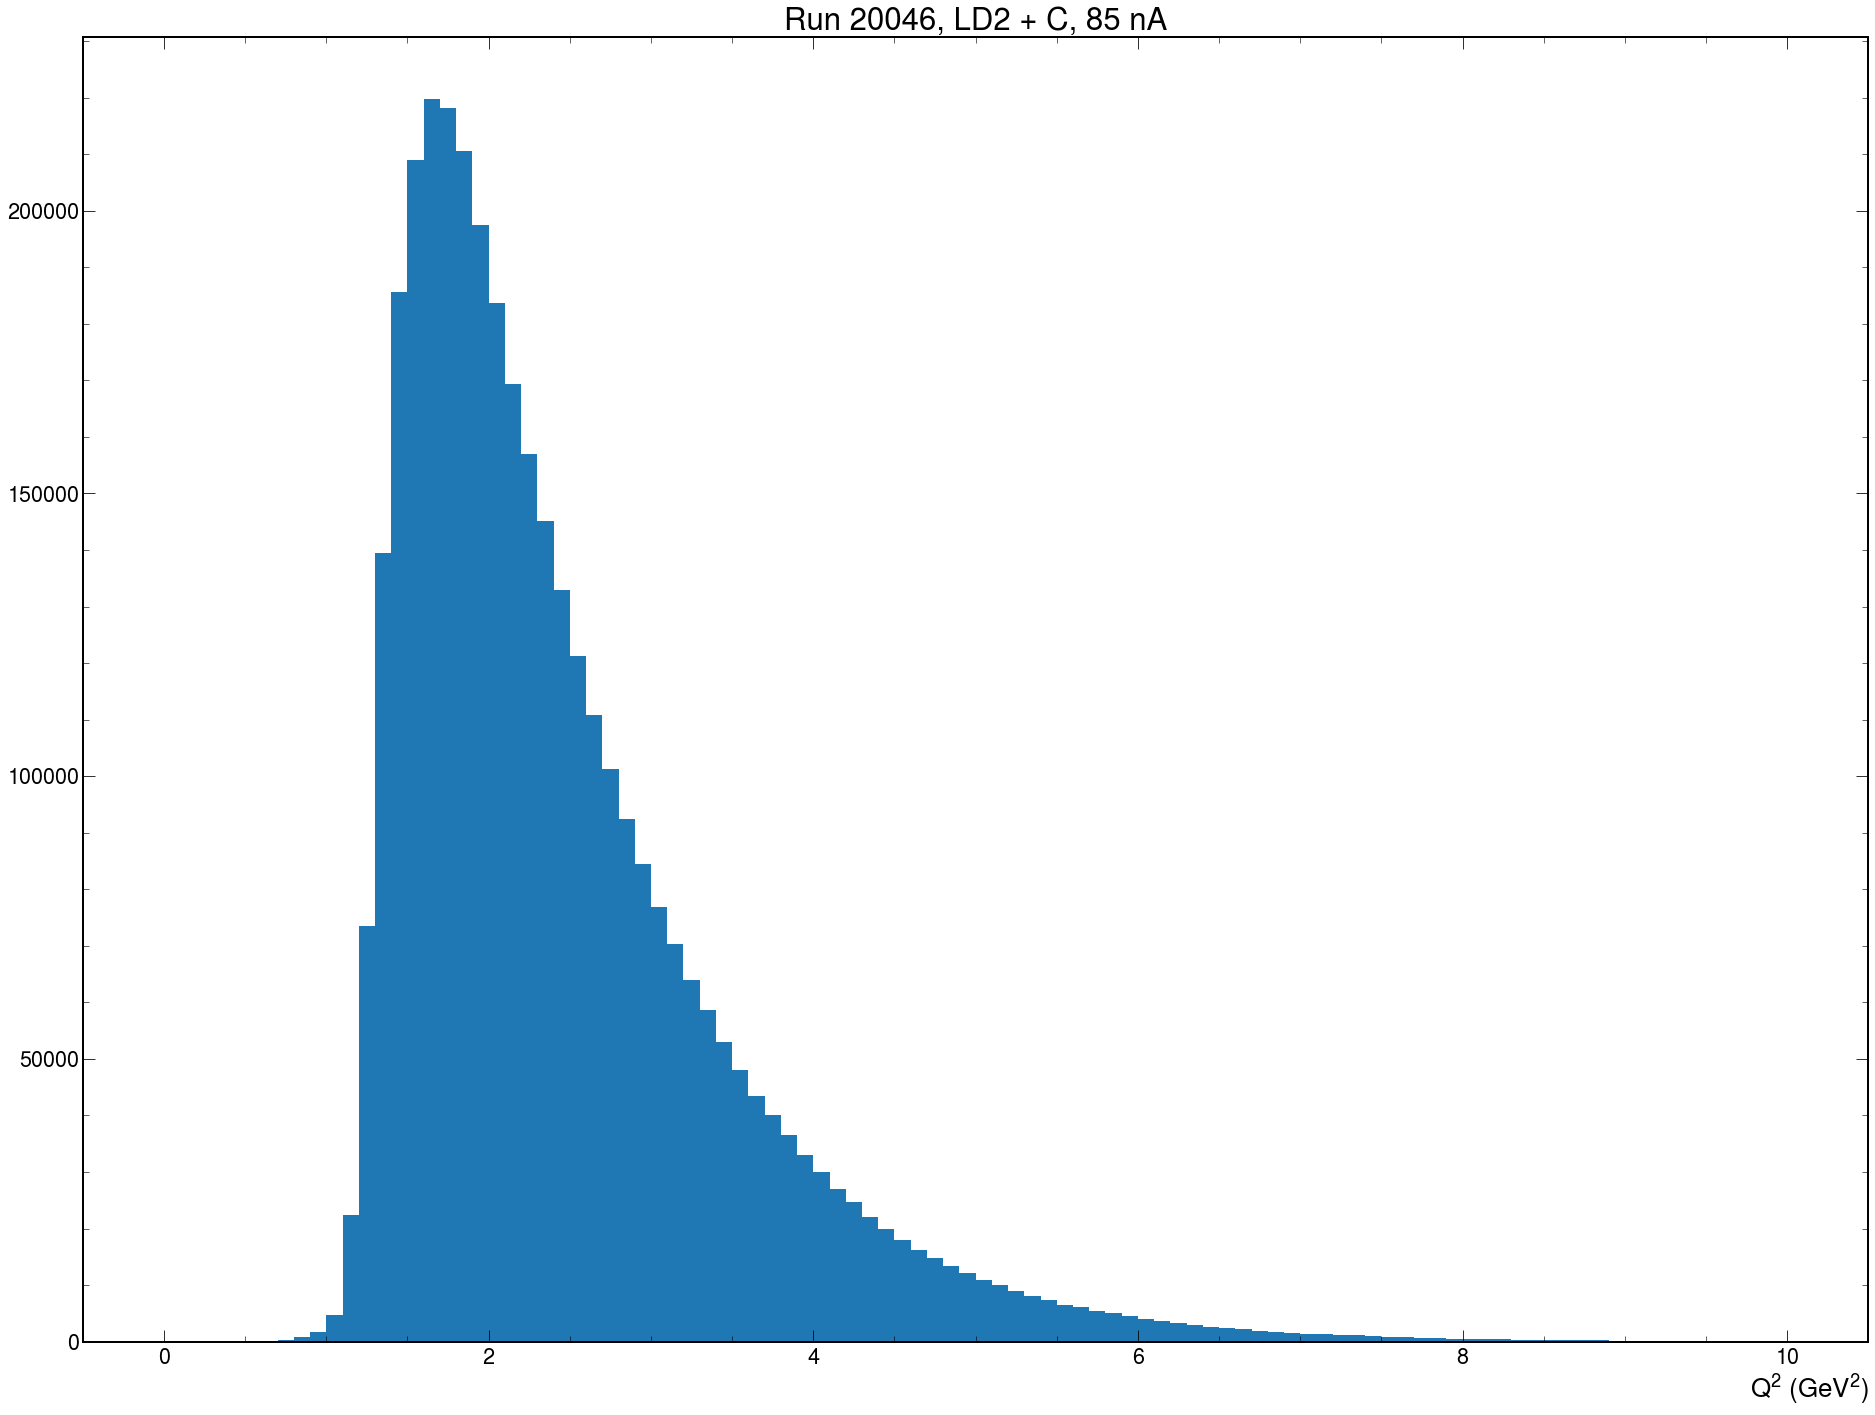

In [26]:
plt.hist(branches["Q2"][electron_cut], bins = 100, range=(0,10))
plt.xlabel("$Q^2~(GeV^2)$")
plt.title("Run 20046, LD2 + C, 85 nA")

Text(0.5, 1.0, 'Run 20046, LD2 + Pb, 60 nA')

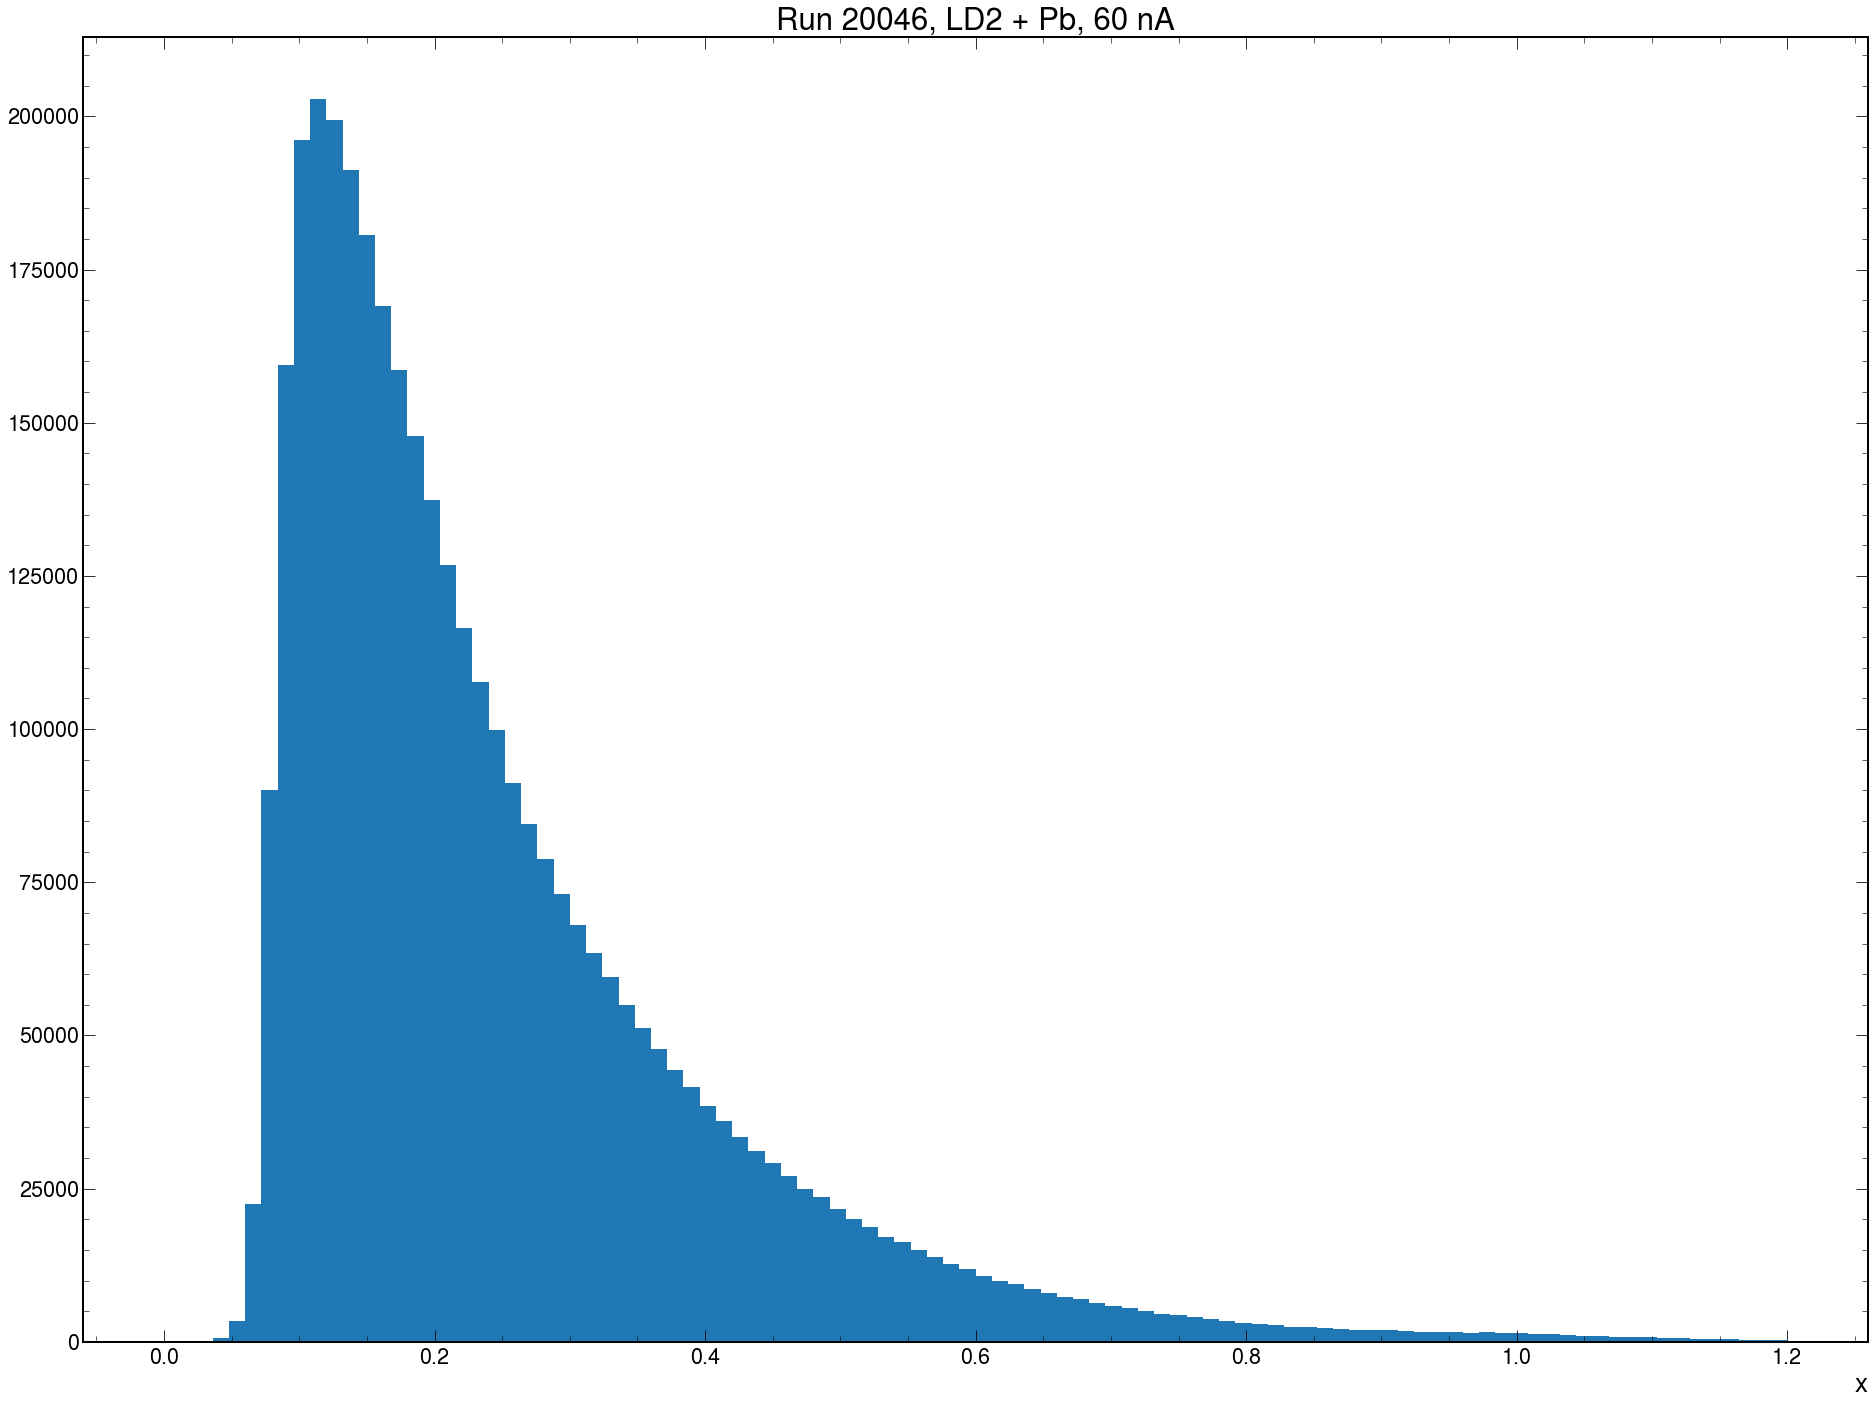

In [27]:
plt.hist(branches["x_bjorken"][electron_cut], bins = 100, range=(0,1.2))
plt.xlabel("$x$")
plt.title("Run 20046, LD2 + Pb, 60 nA")

Text(1, 0, 'Vertex z (cm)')

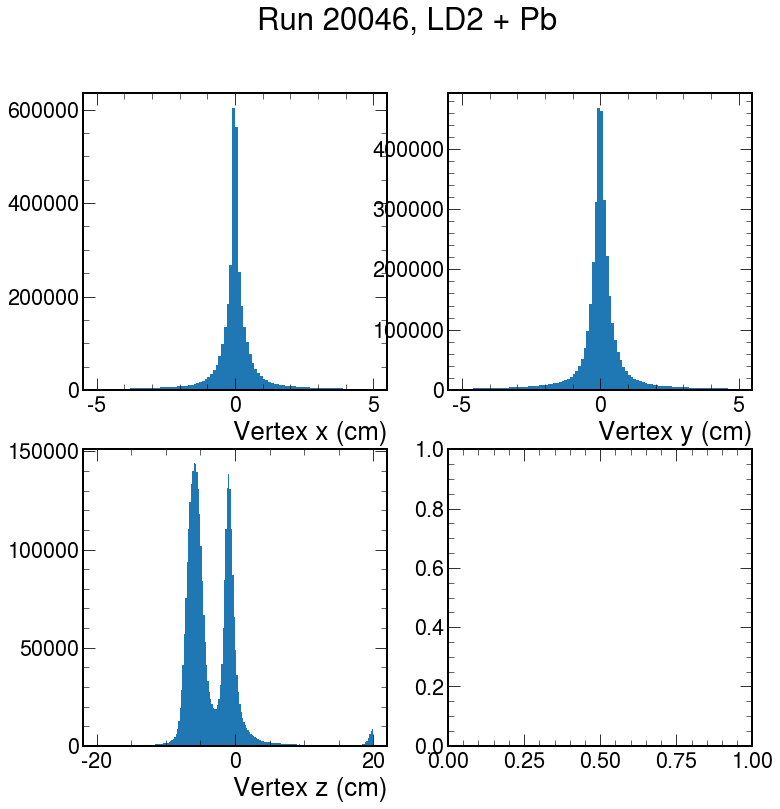

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Run 20046, LD2 + Pb")

ax1.hist(branches["v_x"][electron_cut], bins = 100, range=(-5,5))
ax1.set_xlabel("Vertex x (cm)")

ax2.hist(branches["v_y"][electron_cut], bins = 100, range=(-5,5))
ax2.set_xlabel("Vertex y (cm)")

ax3.hist(branches["v_z"][electron_cut], bins = 200, range=(-20,20))
ax3.set_xlabel("Vertex z (cm)")

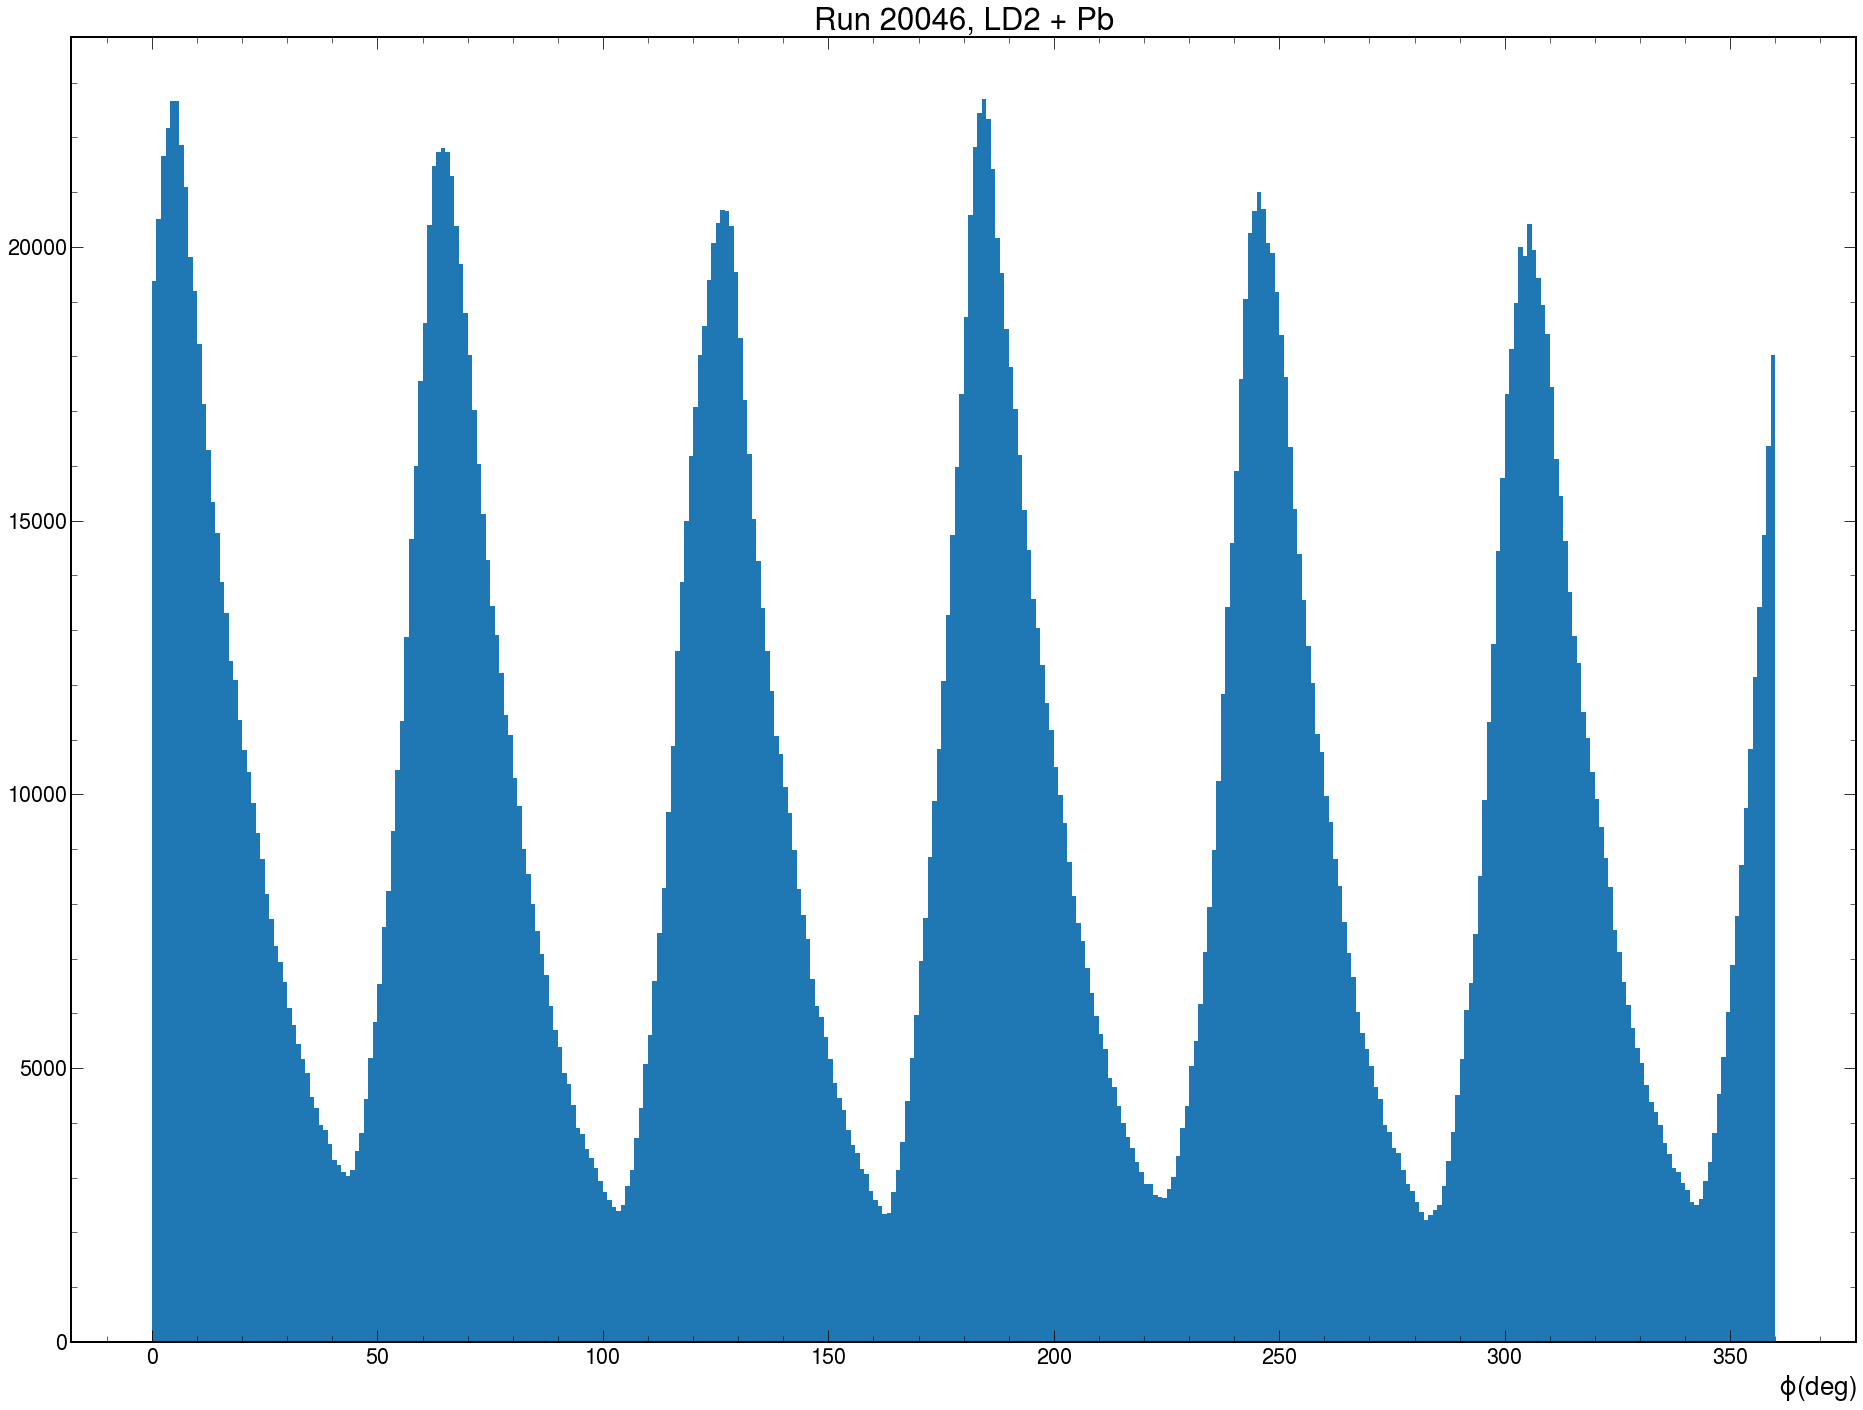

In [29]:
phi = np.asarray(branches["phi"][electron_cut]) # in range [-pi, pi]
phi_degrees = (phi) * 180/np.pi
phi_degrees[phi_degrees<0] += 360
plt.hist(phi_degrees, bins = 360, range=(0,360))
plt.xlabel("$\phi (deg)$")
plt.title("Run 20046, LD2 + Pb")

sector_1_cut = branches["sector"][electron_cut]==1
sector_2_cut = branches["sector"][electron_cut]==2
sector_3_cut = branches["sector"][electron_cut]==3
sector_4_cut = branches["sector"][electron_cut]==4
sector_5_cut = branches["sector"][electron_cut]==5
sector_6_cut = branches["sector"][electron_cut]==6
sector_cuts = [sector_1_cut, sector_2_cut, sector_3_cut, sector_4_cut, sector_5_cut, sector_6_cut]
sector_titles = ["Sector 1", "Sector 2","Sector 3", "Sector 4", "Sector 5", "Sector 6"]

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

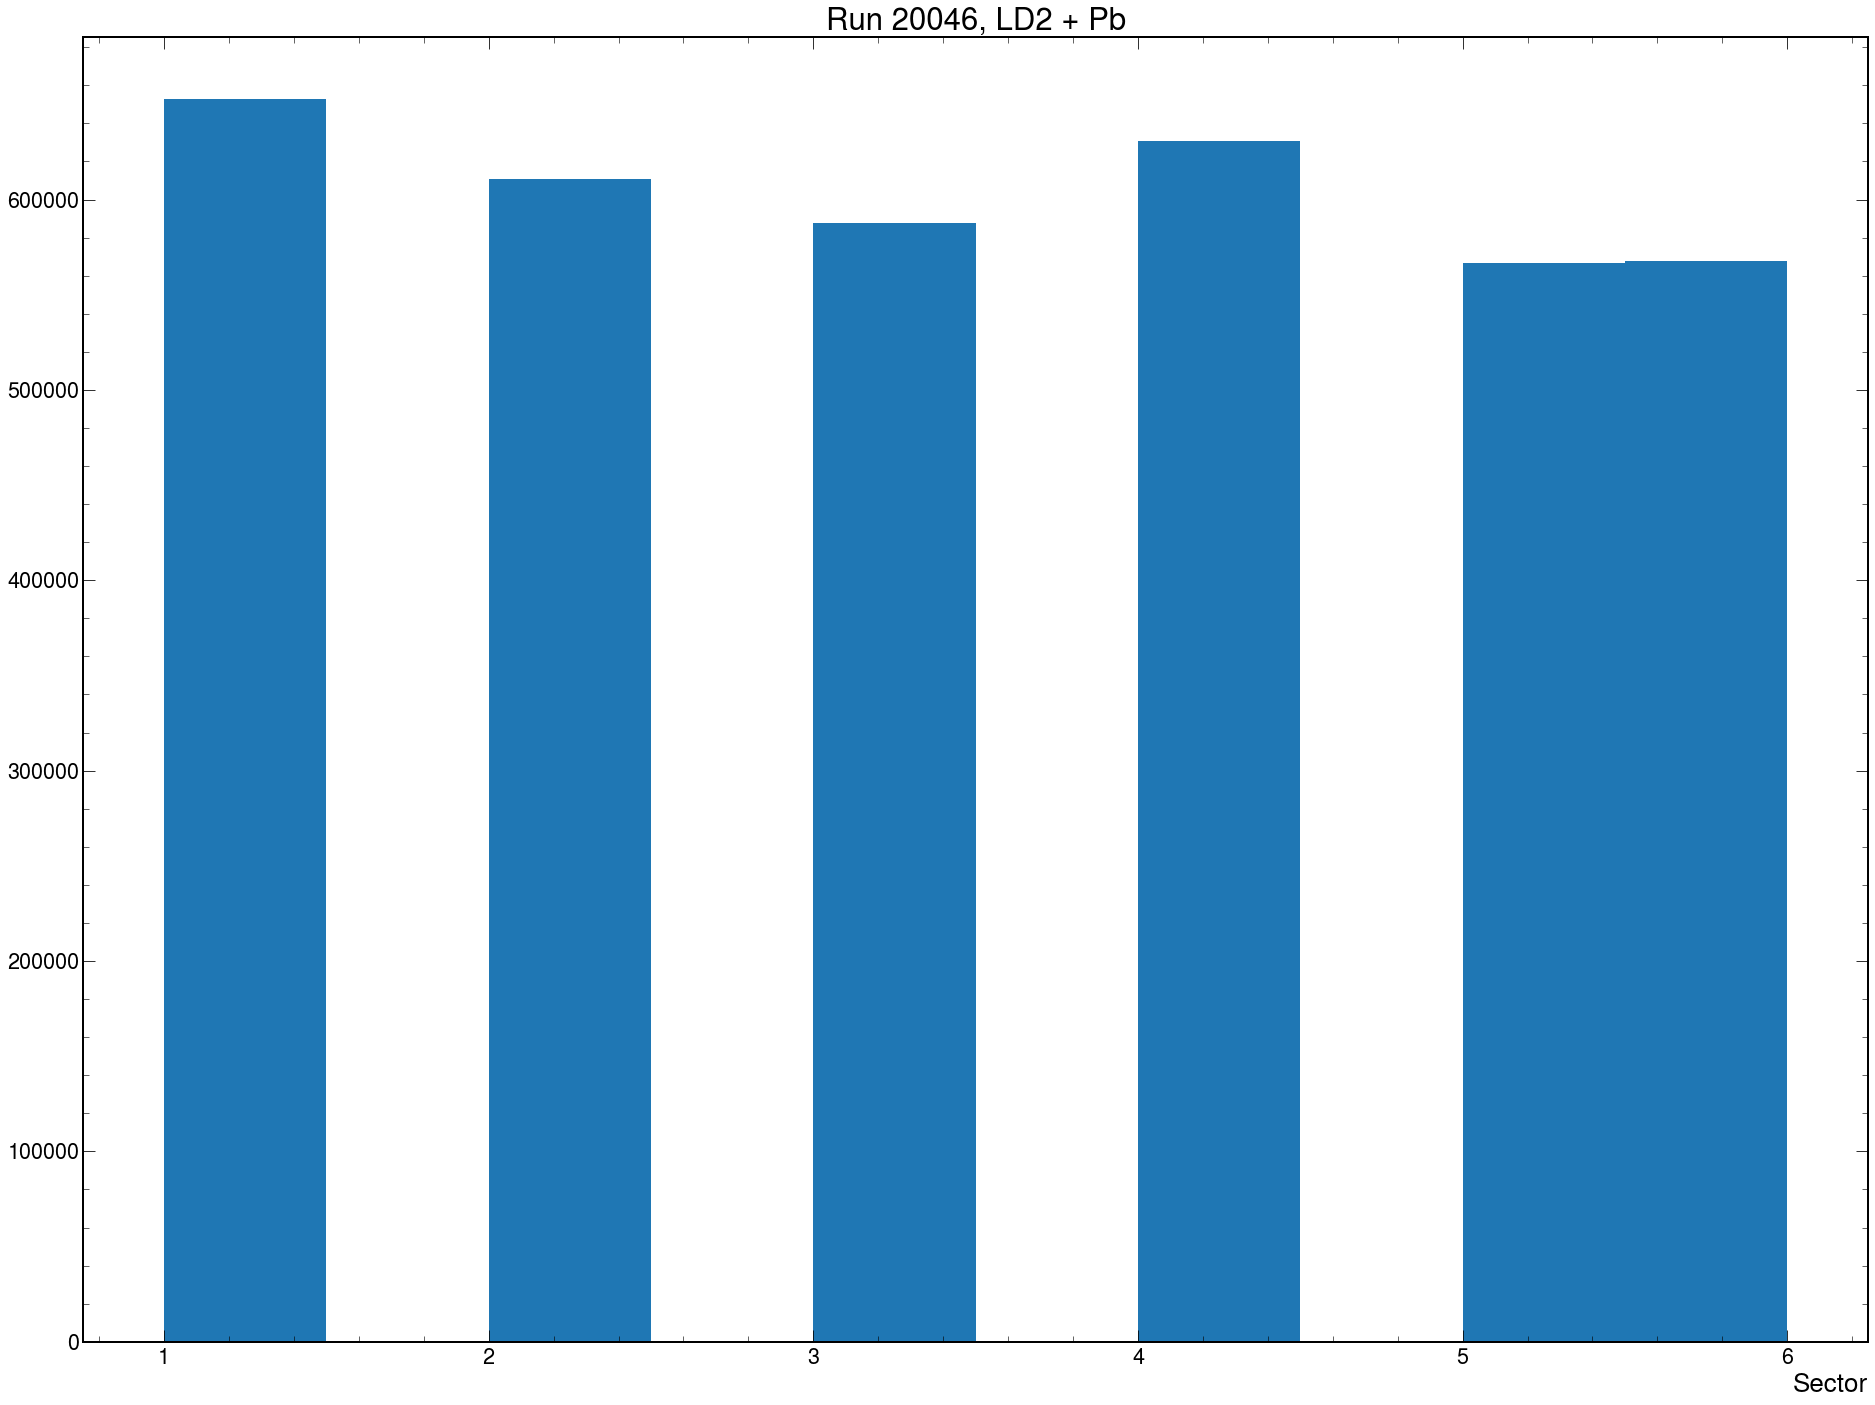

In [30]:
plt.hist(branches["sector"][electron_cut])
plt.xlabel("Sector")
plt.title("Run 20046, LD2 + Pb")

In [31]:
electron_vertex_z = branches["v_z"][electron_cut]

Text(0.5, 0.98, 'Run 20046, LD2 + Pb')

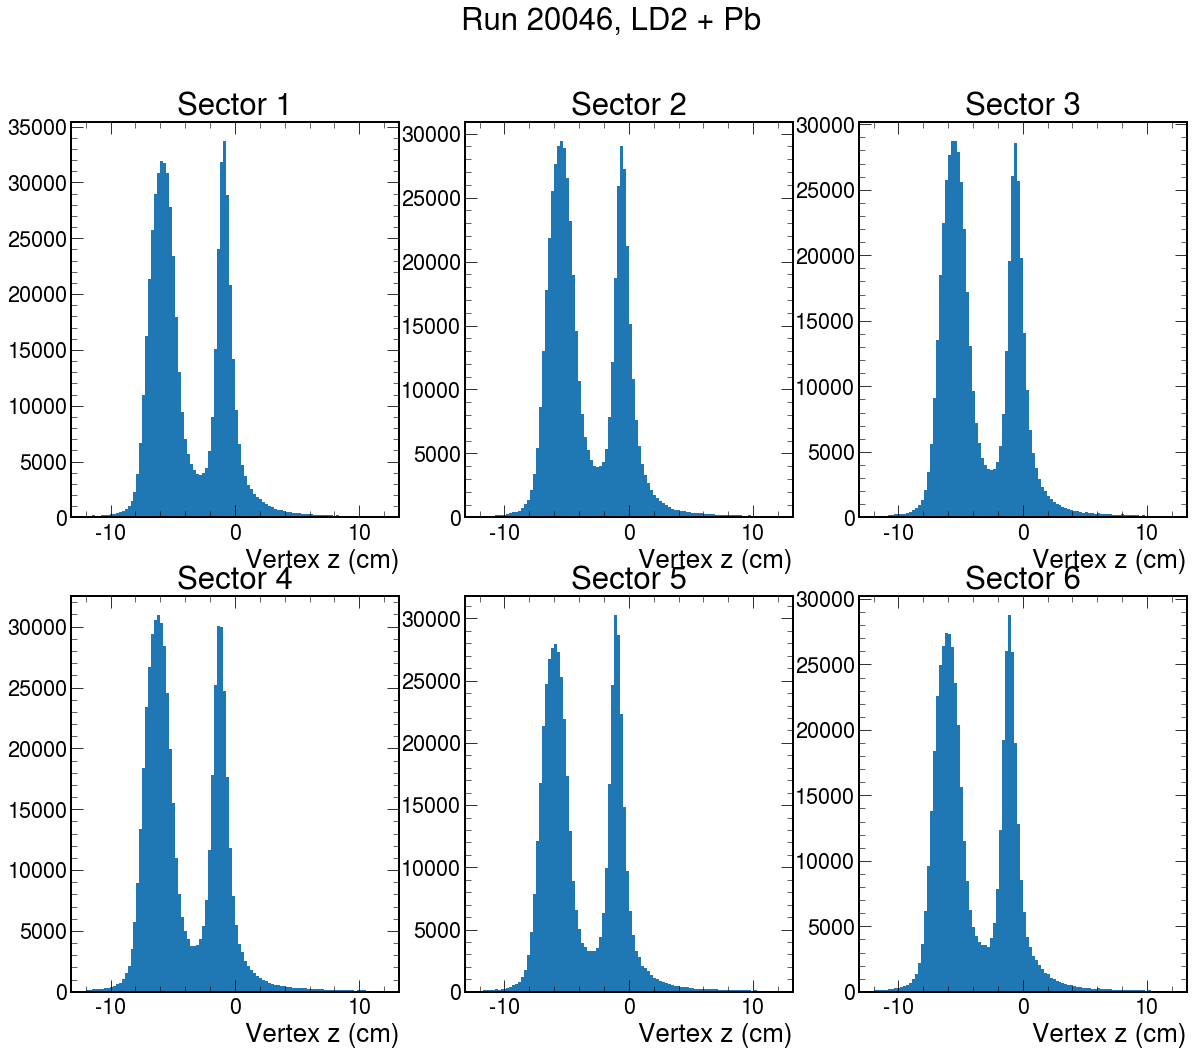

In [32]:
fig, axs = plt.subplots(2,3, figsize=(20,16))
axs = axs.ravel()
for idx,ax in enumerate(axs):
    ax.hist(electron_vertex_z[sector_cuts[idx]], bins = 100, range = (-12, 12))
    ax.set_title(sector_titles[idx])
    ax.set_xlabel("Vertex z (cm)")
fig.suptitle("Run 20046, LD2 + {solid}".format(solid=solid_target))

In [33]:
from scipy.optimize import curve_fit
def double_gaussian(x, amp1, mean1, sigma_squared1, amp2, mean2, sigma_squared2):
    return amp1 * np.exp( -(x - mean1)**2 / (2*sigma_squared1) ) + \
           amp2 * np.exp( -(x - mean2)**2 / (2*sigma_squared2) )

11.87231029481474


Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

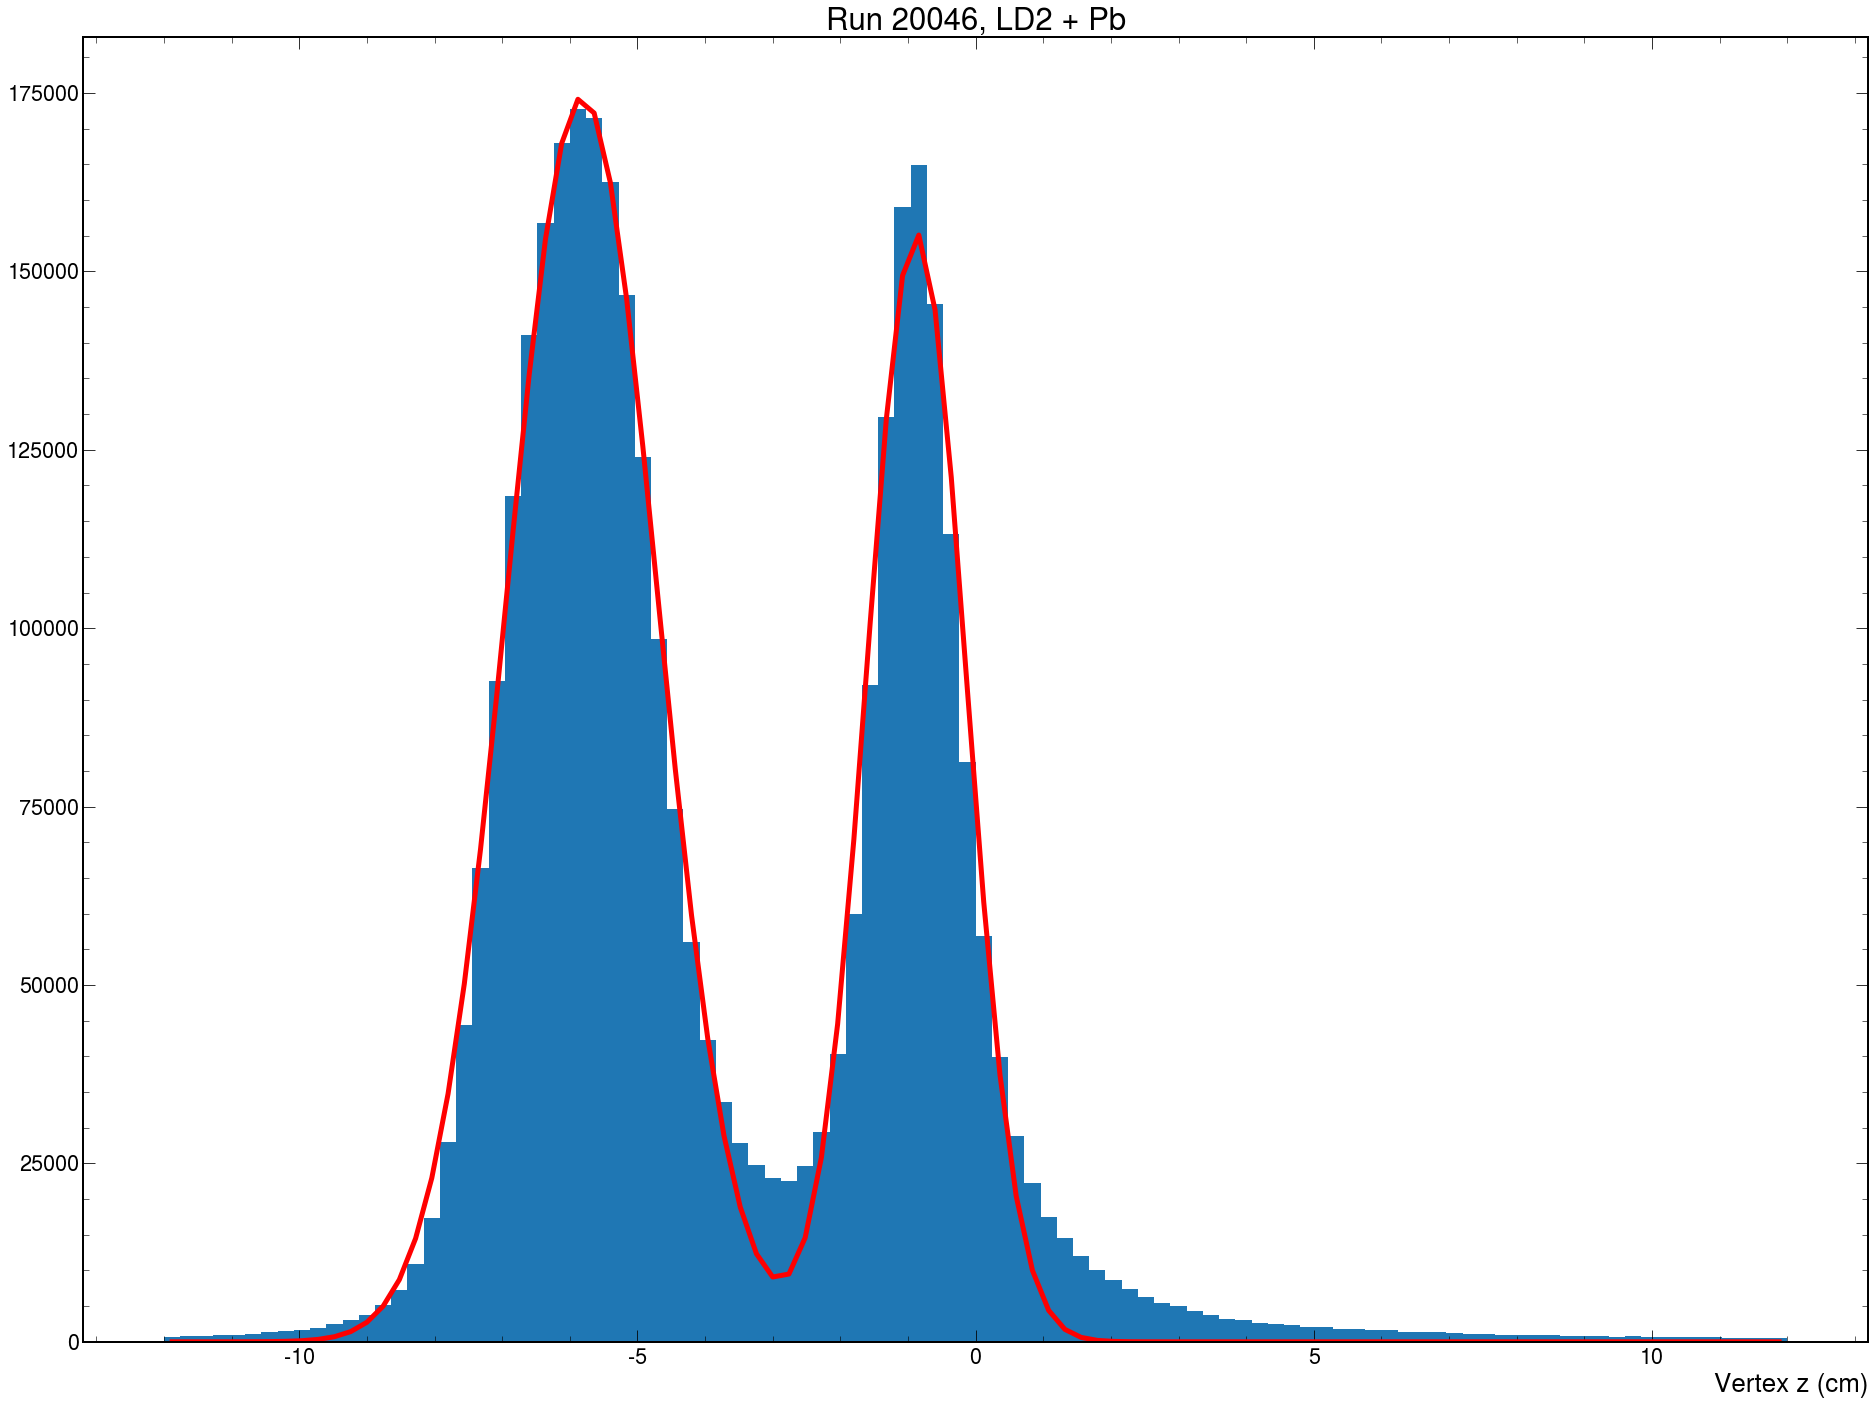

In [34]:
hist_data, bins, patches = plt.hist(electron_vertex_z, bins = 100, range=(-12, 12))

vertex_z_bins = (bins[:-1] + bins[1:])/2
vertex_z_counts = hist_data
mean_guess = ak.mean(electron_vertex_z)
std_guess = ak.std(electron_vertex_z)
print(std_guess)

fit_parameters, fit_covariance = curve_fit(double_gaussian,
                                           vertex_z_bins,
                                           vertex_z_counts, 
                                           p0=(1000, -6.5 ,4, 1000, -1, 1))

y_fit = double_gaussian(vertex_z_bins, *fit_parameters)
plt.plot(vertex_z_bins, y_fit, color='r', linewidth =5)

plt.xlabel("Vertex z (cm)")
plt.title("Run 20046, LD2 + {solid}".format(solid=solid_target))

Deuterium cut: -8.01 < z < -3.62
Solid cut: -1.84 < z < 0.09


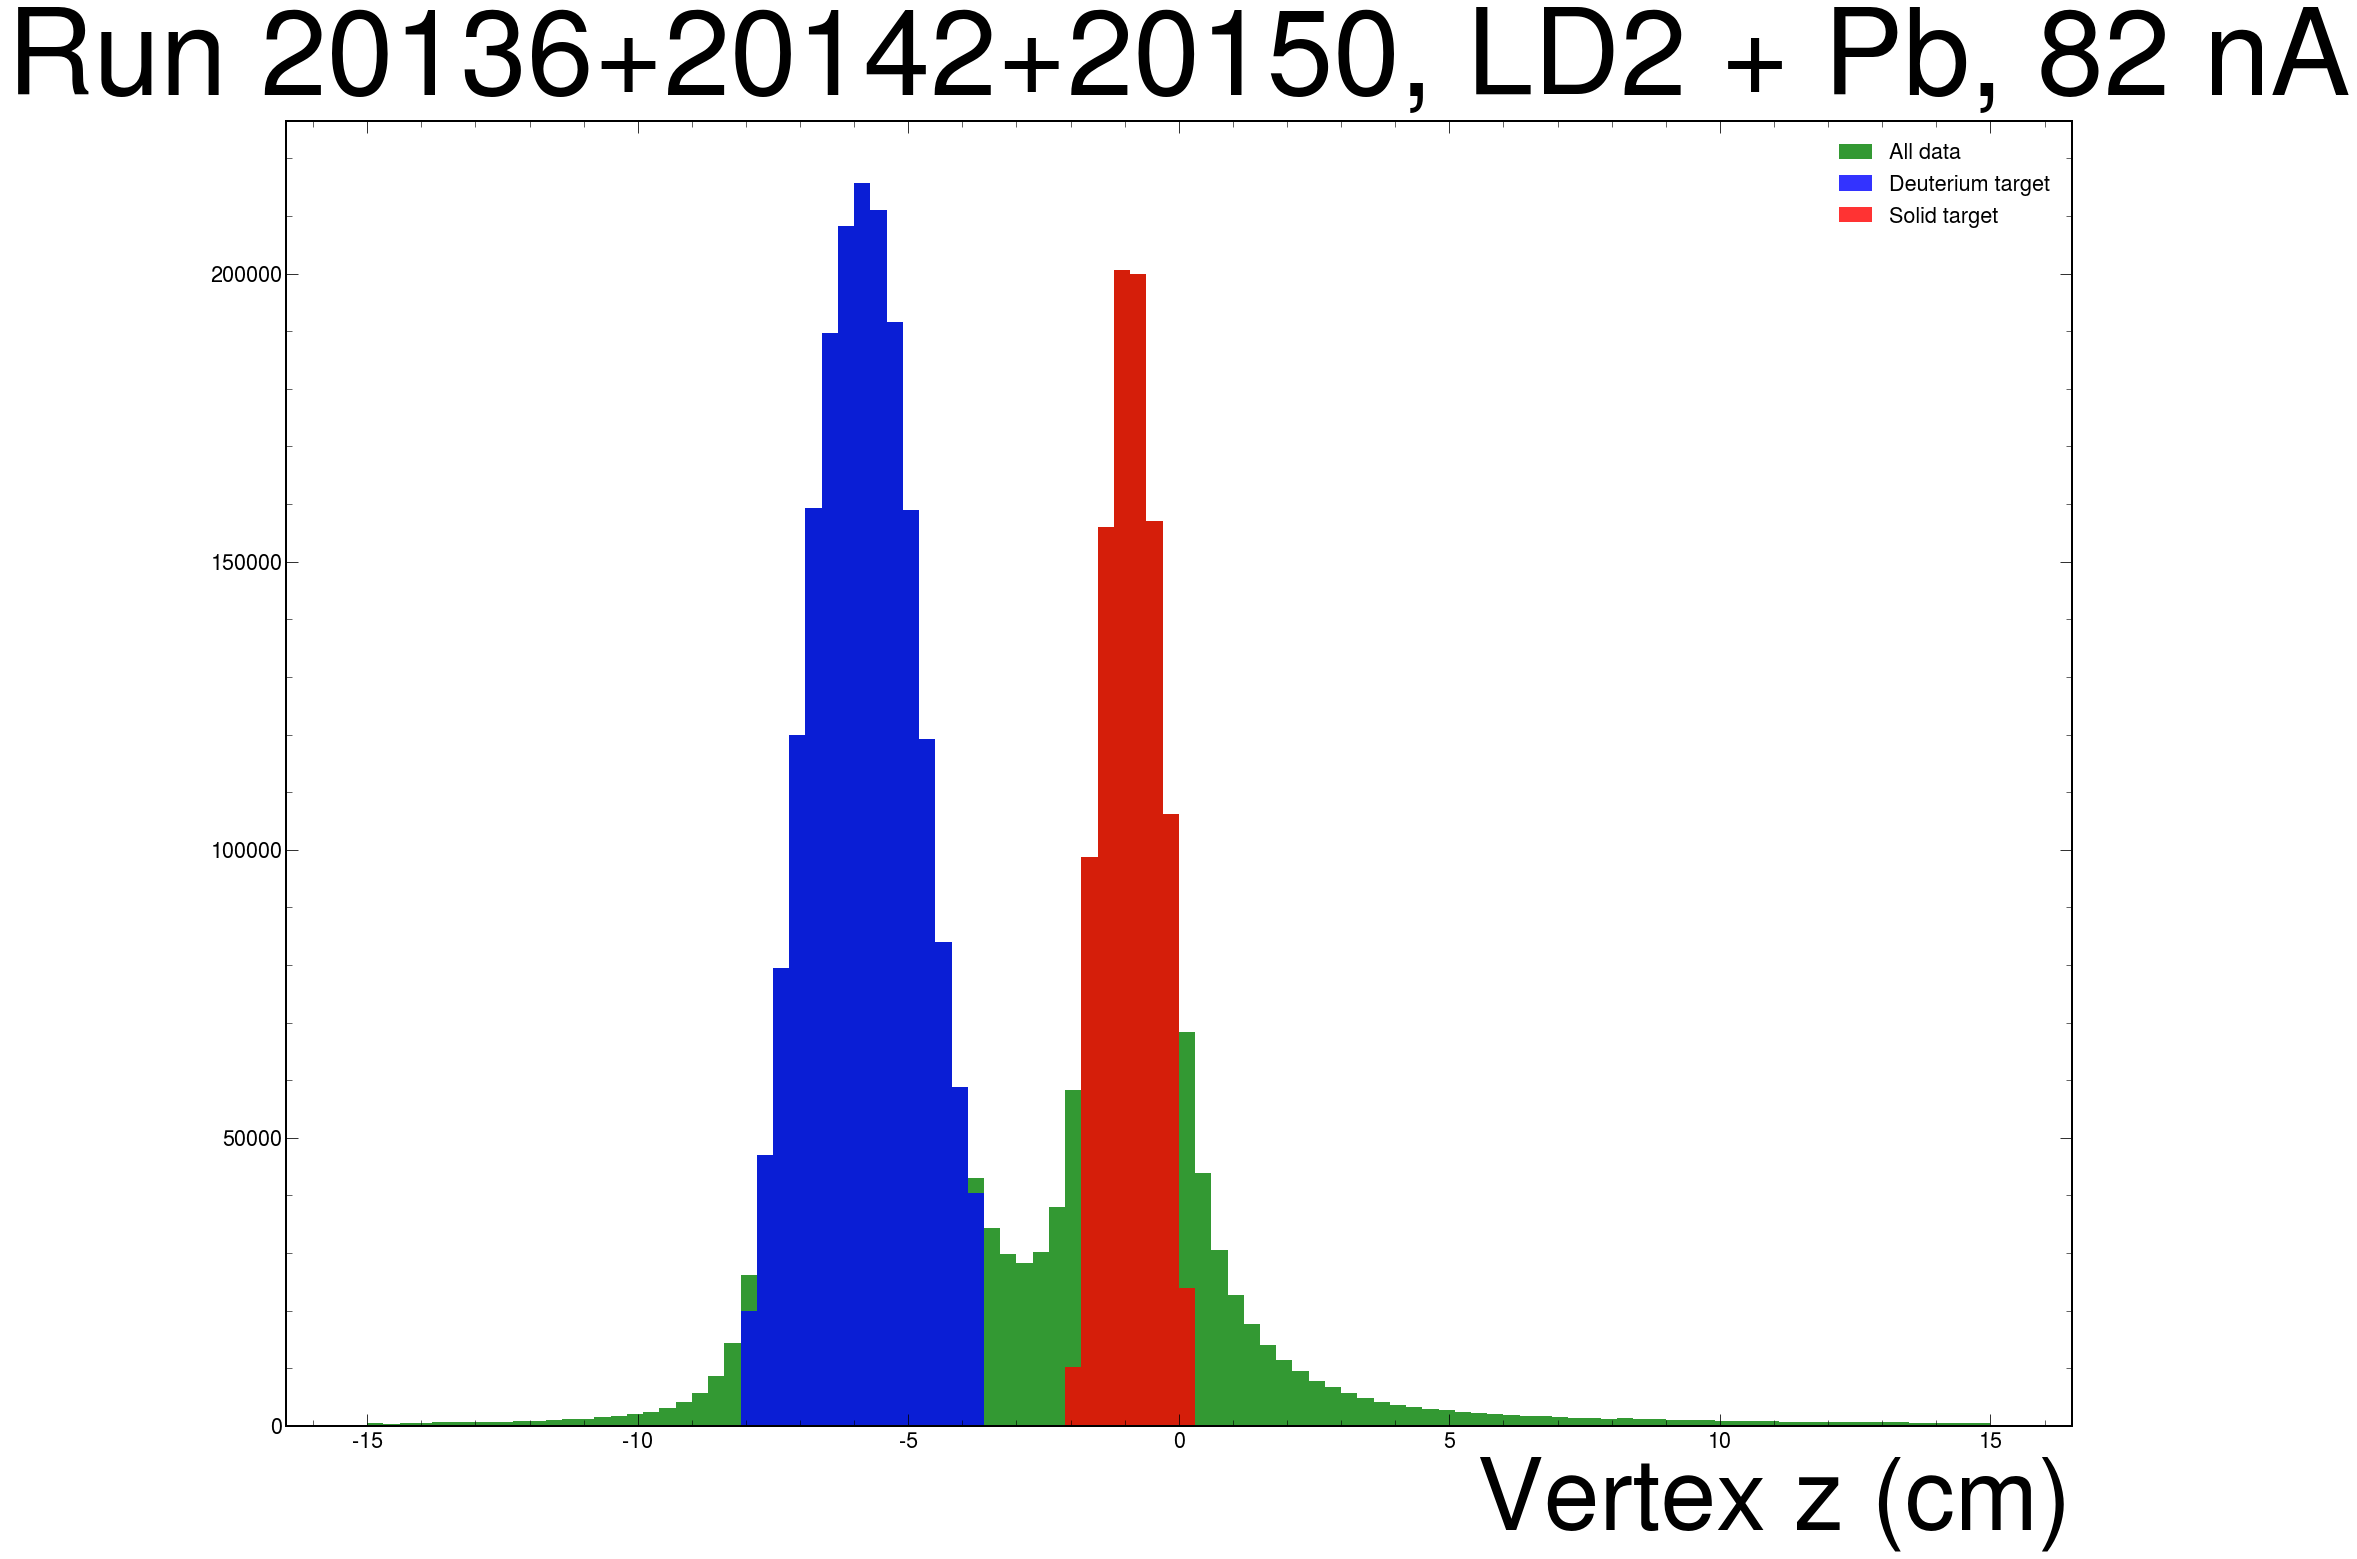

953028
1903242
1.9970473060602627


In [35]:
# Deuterium should have the more negative vertex z position
deuterium_z_mean = min(fit_parameters[1], fit_parameters[4])
if deuterium_z_mean == fit_parameters[1]:
    deuterium_z_sigma = fit_parameters[2]
    solid_z_mean, solid_z_sigma = fit_parameters[4], fit_parameters[5]
elif deuterium_z_mean == fit_parameters[4]:
    deuterium_z_sigma = fit_parameters[5]
    solid_z_mean, solid_z_sigma = fit_parameters[1], fit_parameters[2]

deuterium_cut = (electron_vertex_z > (deuterium_z_mean - 1.8 * deuterium_z_sigma) ) &\
               (electron_vertex_z < (deuterium_z_mean + 1.8 * deuterium_z_sigma) )
solid_cut     = (electron_vertex_z > (solid_z_mean - 1.8 * solid_z_sigma) ) &\
                (electron_vertex_z < (solid_z_mean + 1.8 * solid_z_sigma) )

#deuterium_cut = (electron_vertex_z >  -8.36 ) &\
#                (electron_vertex_z < -3.13 )
#solid_cut     = (electron_vertex_z > -2.58 ) &\
#                (electron_vertex_z <  0.8 )


print("Deuterium cut: {low} < z < {high}".format(low=round(deuterium_z_mean - 1.8 * deuterium_z_sigma, 2),
                                                 high=round(deuterium_z_mean + 1.8 * deuterium_z_sigma ,2)))
print("Solid cut: {low} < z < {high}".format(low=round(solid_z_mean - 1.8 * solid_z_sigma, 2),
                                                 high=round(solid_z_mean + 1.8 * solid_z_sigma, 2) ))
plt.hist(electron_vertex_z,
         bins = 100,
         range=(-15, 15),
         color='g',
         label="All data",
         alpha=.8)
plt.hist(electron_vertex_z[deuterium_cut],
         bins = 100,
         range=(-15, 15),
         color='b',
         label="Deuterium target",
         alpha=.8)
plt.hist(electron_vertex_z[solid_cut],
         bins = 100,
         range=(-15, 15),
         color='r',
         label="Solid target",
         alpha=.8)

plt.xlabel("Vertex z (cm)", fontsize = 100)
plt.title("Run 20136+20142+20150, LD2 + {solid}, 82 nA".format(solid=solid_target),fontsize = 120)
plt.legend()
plt.show()

print(len(electron_vertex_z[solid_cut]))
print(len(electron_vertex_z[deuterium_cut]))
print(len(electron_vertex_z[deuterium_cut])/len(electron_vertex_z[solid_cut]))

Text(0.5, 1.0, 'LD2 + Sn \n positive particles, 65nA ,p<10 GeV \n $0<\\beta<1.2$')

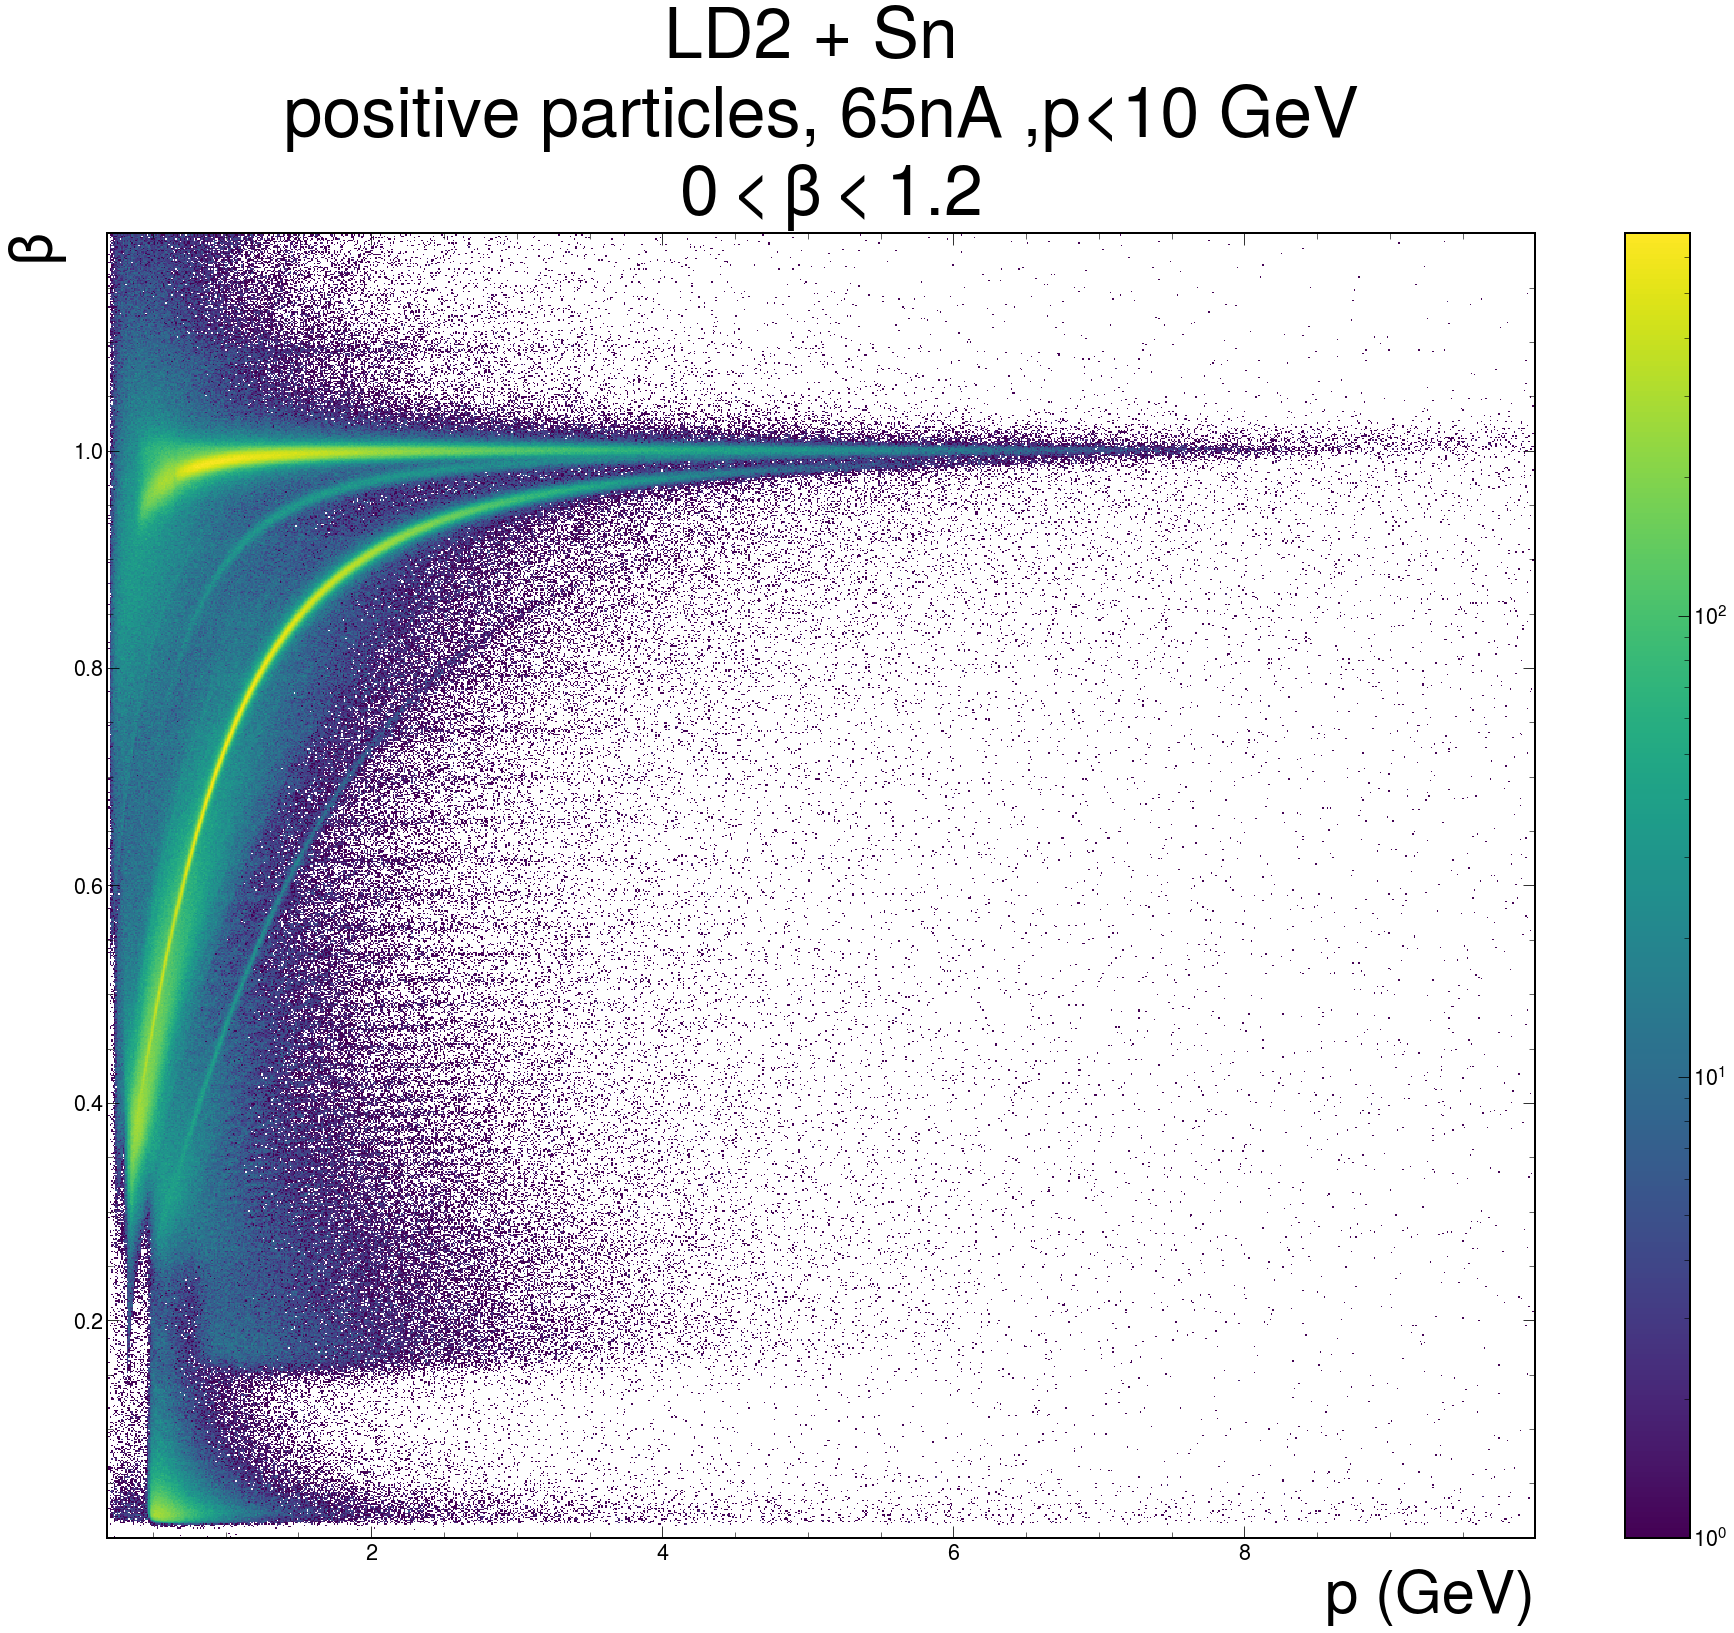

In [36]:
import matplotlib.colors as mcolors
charge_cut = branches["charge"]>0
momentum_cut = (branches["p"] < 10) 
beta_cut = (branches["beta"] > 0) & (branches["beta"] < 1.2)
cuts = charge_cut & momentum_cut & beta_cut
plt.hist2d(np.array(branches["p"][cuts]),
           np.array(branches["beta"][cuts]),
           bins=(1000, 1000),
           norm=mcolors.LogNorm())
plt.xlabel("p (GeV)", fontsize=60)
plt.ylabel("$\\beta$", fontsize=60)
plt.colorbar()
plt.title("LD2 + Sn \n positive particles, 65nA ,p<10 GeV \n $0<\\beta<1.2$", fontsize = 70)

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

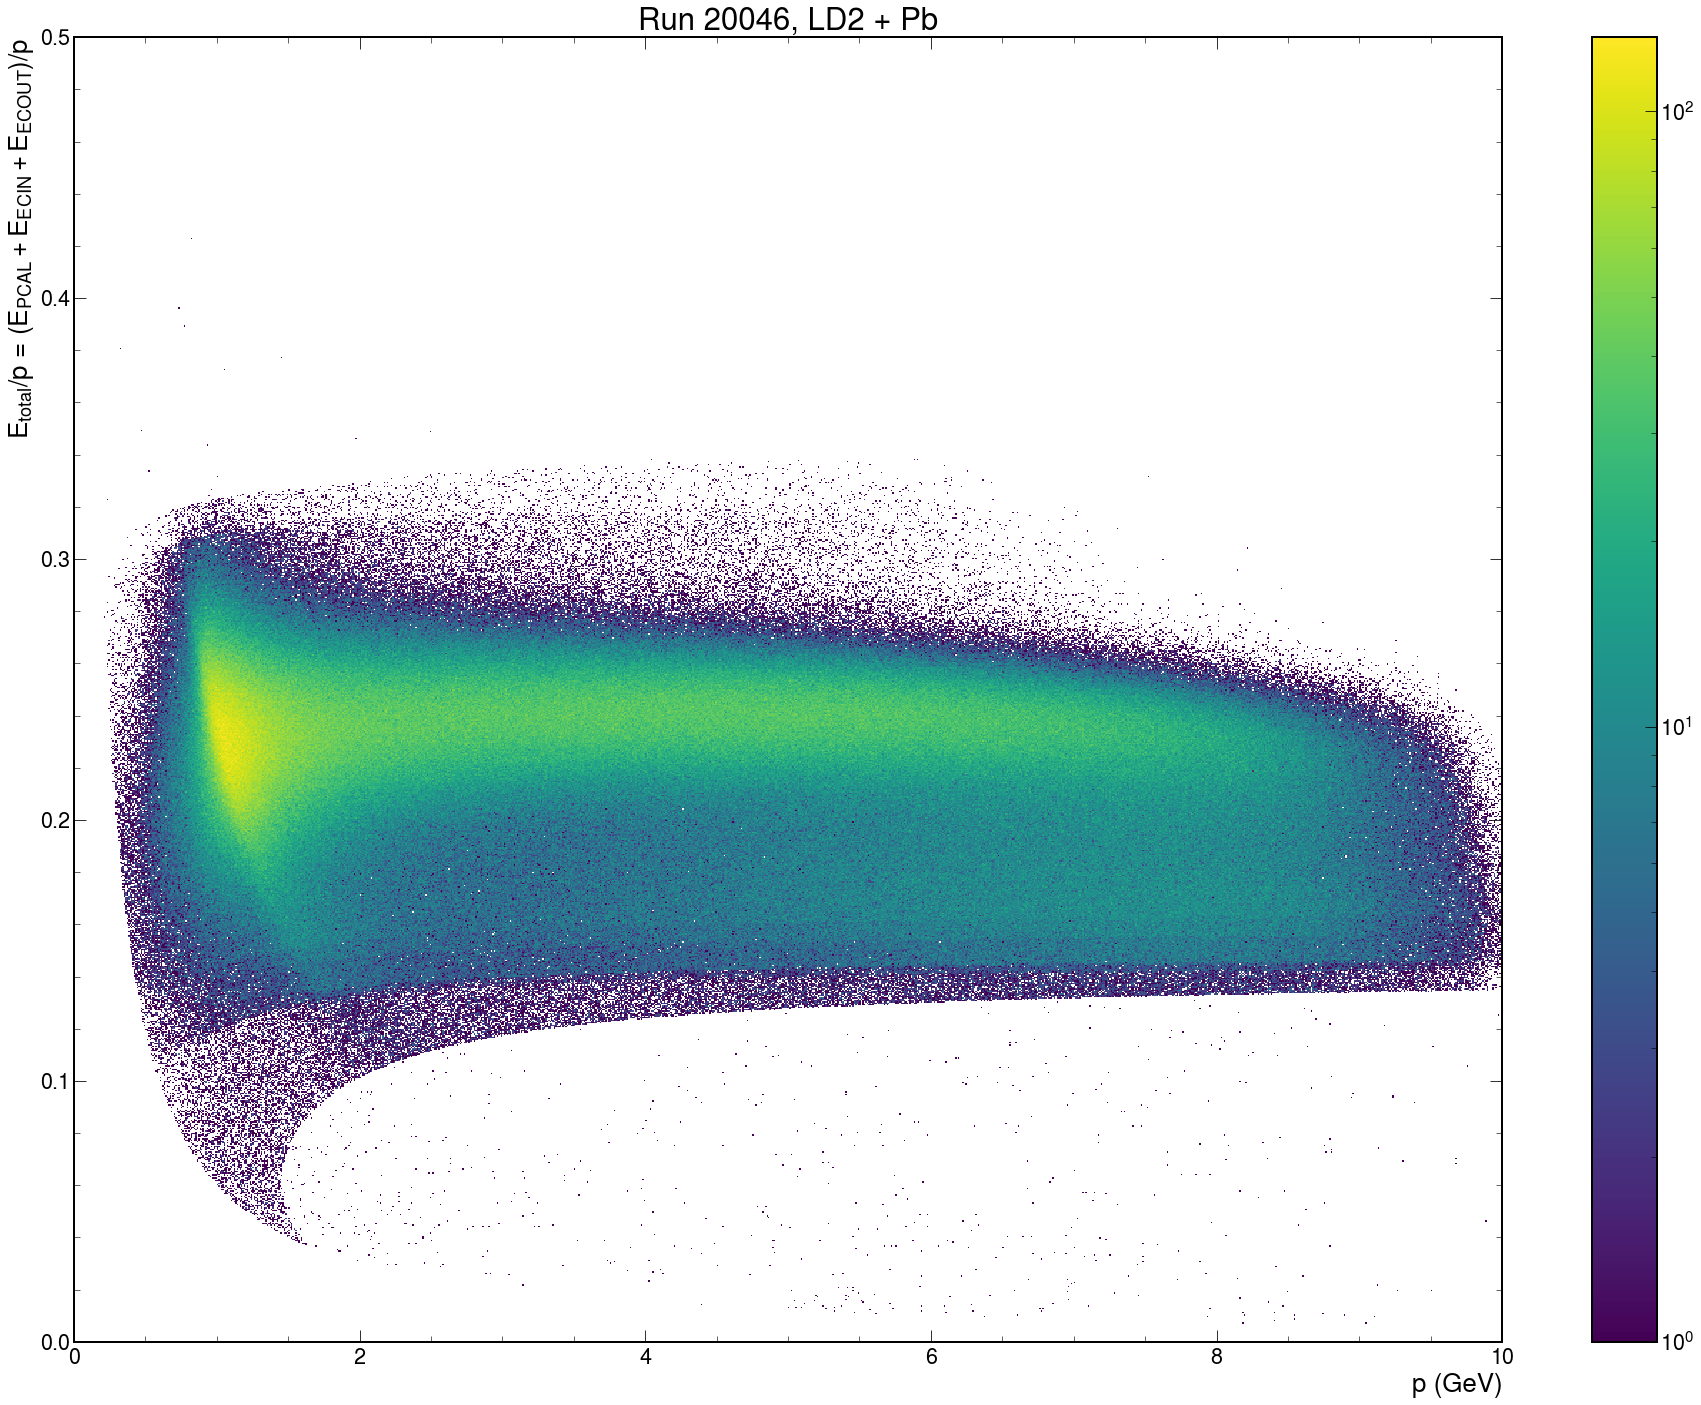

In [37]:
cut = (np.array(branches["E_total"])>0) & np.array(branches["pid"]==11)
plt.hist2d(np.array(branches["p"][cut]),
           np.array(branches["E_total"][cut])/np.array(branches["p"][cut]),
           bins=(1000, 1000),
           range=[(0, 10),(0,0.5)],
           norm=mcolors.LogNorm())
plt.xlabel("p (GeV)")
plt.ylabel("$E_{total}$/p = $(E_{PCAL} + E_{ECIN} + E_{ECOUT})$/p")
plt.colorbar()
plt.title("Run 20046, LD2 + Pb")

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

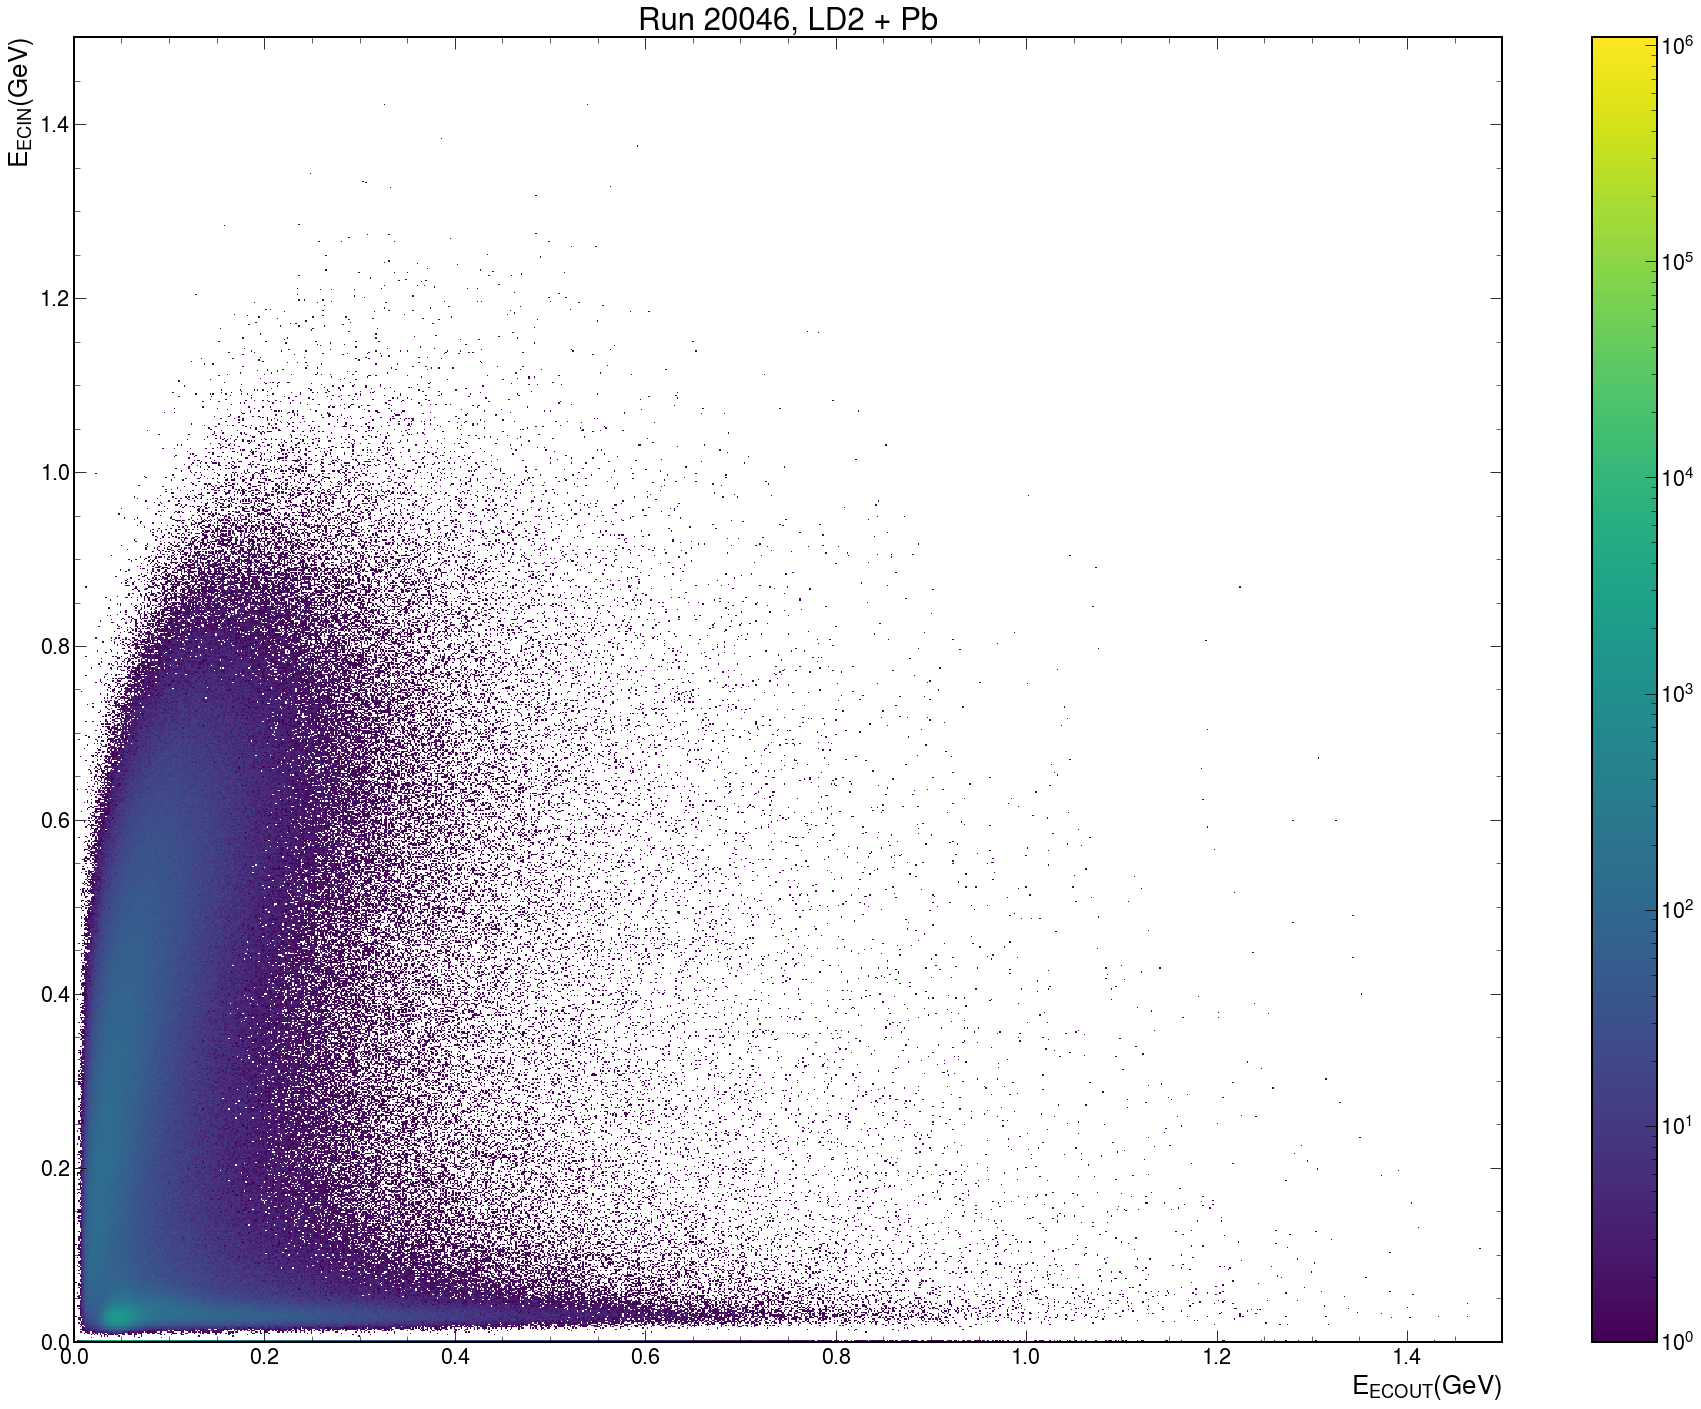

In [38]:
cut = (np.array(branches["E_total"])>0)
plt.hist2d(np.array(branches["E_ECOU"][cut]),
           np.array(branches["E_ECIN"][cut]),
           bins=(1000, 1000),
           range=[(0, 1.5),(0,1.5)],
           norm=mcolors.LogNorm())
plt.ylabel("$E_{ECIN} (GeV)$")
plt.xlabel("$E_{ECOUT} (GeV)$")
plt.colorbar()
plt.title("Run 20046, LD2 + Pb")